# Titanic survival
The goal of the project is to predict whether a passenger of the Titanic survived to the disaster, by using its data (class, age, spouses or children being with them)

### Libraries import

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Datasets import

In [2]:
train_df = pd.read_csv('./datasets/train.csv',
                       index_col='PassengerId')

train_df.head(7)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.Cabin.isna().sum()/len(train_df)

0.7710437710437711

#### A few comments, what will I do?
* Cabin column: I will drop this column as too much data is missing (>77%)
* Ticket column: I will drop this as well as the ticket code is unuseful
* Age: must be filled in, maybe I can distinguish between females and males
* Embarked: I will probably fill in the missing values by using the most frequent value
* Numeric columns differ in scale, a rescale is in order
* Text column should be encoded using Onehotencoder
* Finally, I will implement all by using a pipeline

# A) Without Pipeline

In [6]:
# Let's drop Cabin, Ticket from the train_df

train_df.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [7]:
# I want to add a new variable that, for female passengers tells us if they are married or not

def female_married(name):
    if 'Mrs.' in name:
        return 1
    else:
        return 0
    

In [8]:
train_df['MarriedFem'] = train_df['Name'].apply(female_married)
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,MarriedFem
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,0


[Text(0.5, 1.0, '# of accompanying Parents or children distribution')]

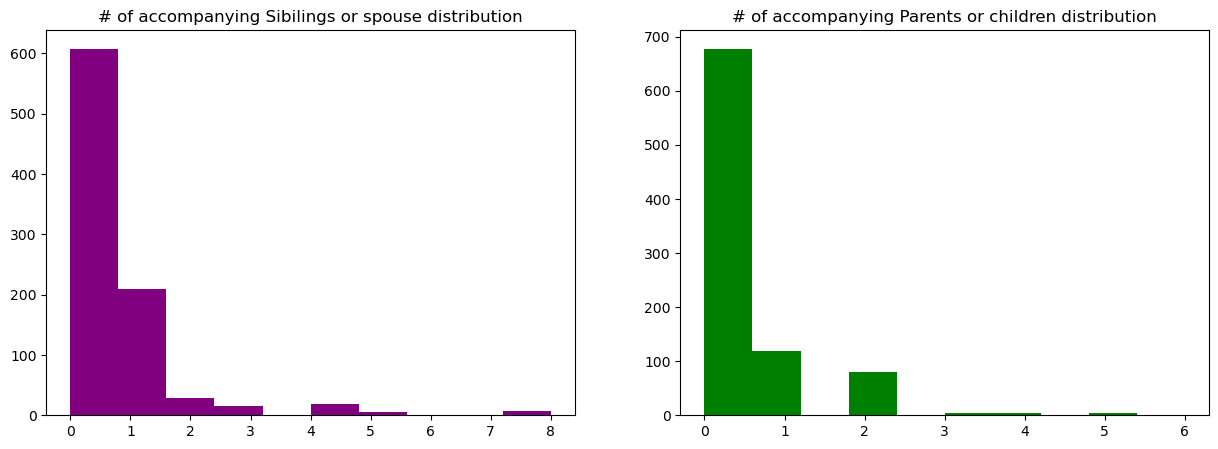

In [9]:
fig, ax = plt.subplots(nrows=1,
                       ncols=2,
                       figsize=(15,5))

hist0 = ax[0].hist(train_df['SibSp'],
                   color='purple')
ax[0].set(title='# of accompanying Sibilings or spouse distribution')

hist1 = ax[1].hist(train_df['Parch'],
                   color='green')
ax[1].set(title='# of accompanying Parents or children distribution')